In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
demo_df = pd.read_csv('../Dataset/DEMO.csv')
pbcd_df = pd.read_csv('../Dataset/PBCD_I.csv')
rhq_df = pd.read_csv('../Dataset/RHQ_I.csv')
tst_df = pd.read_csv('../Dataset/TST_I.csv')

# Drop index columns if present
for df in [demo_df, pbcd_df, rhq_df, tst_df]:
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)


In [3]:
demo_df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,83732,9,2,1,62,NaN,3,3,1.0,NaN,...,5.0,1.0,3.0,134671.370419,135629.507405,1,125,10.0,10.0,4.39
1,83733,9,2,1,53,NaN,3,3,1.0,NaN,...,3.0,3.0,NaN,24328.560239,25282.425927,1,125,4.0,4.0,1.32
2,83734,9,2,1,78,NaN,3,3,2.0,NaN,...,3.0,1.0,3.0,12400.008522,12575.838818,1,131,5.0,5.0,1.51
3,83735,9,2,2,56,NaN,3,3,2.0,NaN,...,5.0,6.0,NaN,102717.995647,102078.634508,1,131,10.0,10.0,5.00
4,83736,9,2,2,42,NaN,4,4,2.0,NaN,...,4.0,3.0,NaN,17627.674984,18234.736219,2,126,7.0,7.0,1.23


In [4]:
# Configure pandas to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [5]:
pbcd_i_columns = {
    'SEQN': 'Respondent sequence number', # [cite: 498, 500]
    'WTSH2YR': 'Blood metal weights', # [cite: 506]
    'LBXBPB': 'Blood lead (ug/dL)', # [cite: 512]
    'LBDBPBSI': 'Blood lead (umol/L)', # [cite: 519, 521]
    'LBDBPBLC': 'Blood lead comment code', # [cite: 525]
    'LBXBCD': 'Blood cadmium (ug/L)', # [cite: 527]
    'LBDBCDSI': 'Blood cadmium (umol/L)', # [cite: 529]
    'LBDBCDLC': 'Blood cadmium comment code', # [cite: 531]
    'LBXTHG': 'Blood mercury, total (ug/L)', # [cite: 533]
    'LBDTHGSI': 'Blood mercury, total (nmol/L)', # [cite: 535]
    'LBDTHGLC': 'Blood mercury, total comment code', # [cite: 537]
    'LBXBSE': 'Blood selenium (ug/L)', # [cite: 539]
    'LBDBSESI': 'Blood selenium (umol/L)', # [cite: 541]
    'LBDBSELC': 'Blood selenium comment code', # [cite: 543]
    'LBXBMN': 'Blood manganese (ug/L)', # [cite: 545]
    'LBDBMNSI': 'Blood manganese (umol/L)', # [cite: 547]
    'LBDBMNLC': 'Blood manganese comment code' # [cite: 549]
}
tst_i_columns = {
    'SEQN': 'Respondent sequence number', # [cite: 672, 673, 676, 677]
    'LBXTST': 'Testosterone, total (ng/dL)', # [cite: 680, 681]
    'LBDTSTLC': 'Testosterone comment code', # [cite: 689]
    'LBXEST': 'Estradiol (pg/mL)', # [cite: 695, 697]
    'LBDESTLC': 'Estradiol Comment Code', # [cite: 701]
    'LBXSHBG': 'Sex Hormone Binding Globulin (SHBG, nmol/L)', # [cite: 703]
    'LBDSHGLC': 'SHBG Comment Code' # [cite: 705]
}

demo_i_columns = {
    'SEQN': 'Respondent sequence number',
    'SDDSRVYR': 'Data release cycle',
    'RIDSTATR': 'Interview/Examination status',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age in years at screening',
    'RIDAGEMN': 'Age in months at screening - 0 to 24 mos',
    'RIDRETH1': 'Race/Hispanic origin',
    'RIDRETH3': 'Race/Hispanic origin w/ NH Asian',
    'RIDEXMON': 'Six month time period',
    'RIDEXAGM': 'Age in months at exam - 0 to 19 years',
    'DMQMILIZ': 'Served active duty in US Armed Forces',
    'DMQADFC': 'Served in a foreign country',
    'DMDBORN4': 'Country of birth',
    'DMDCITZN': 'Citizenship status',
    'DMDYRSUS': 'Length of time in US',
    'DMDEDUC3': 'Education level - Children/Youth 6-19',
    'DMDEDUC2': 'Education level - Adults 20+',
    'DMDMARTL': 'Marital status',
    'RIDEXPRG': 'Pregnancy status at exam',
    'SIALANG': 'Language of SP Interview',
    'SIAPROXY': 'Proxy used in SP Interview?',
    'SIAINTRP': 'Interpreter used in SP Interview?',
    'FIALANG': 'Language of Family Interview',
    'FIAPROXY': 'Proxy used in Family Interview?',
    'FIAINTRP': 'Interpreter used in Family Interview?',
    'MIALANG': 'Language of MEC Interview',
    'MIAPROXY': 'Proxy used in MEC Interview?',
    'MIAINTRP': 'Interpreter used in MEC Interview?',
    'AIALANGA': 'Language of ACASI Interview',
    'DMDHHSIZ': 'Total number of people in the Household',
    'DMDFMSIZ': 'Total number of people in the Family',
    'DMDHHSZA': '# of children 5 years or younger in HH',
    'DMDHHSZB': '# of children 6-17 years old in HH',
    'DMDHHSZE': '# of adults 60 years or older in HH',
    'DMDHRGND': "HH ref person's gender",
    'DMDHRAGE': "HH ref person's age in years",
    'DMDHRBR4': "HH ref person's country of birth",
    'DMDHREDU': "HH ref person's education level",
    'DMDHRMAR': "HH ref person's marital status",
    'DMDHSEDU': "HH ref person's spouse's education level",
    'WTINT2YR': 'Full sample 2 year interview weight',
    'WTMEC2YR': 'Full sample 2 year MEC exam weight',
    'SDMVPSU': 'Masked variance pseudo-PSU',
    'SDMVSTRA': 'Masked variance pseudo-stratum',
    'INDHHIN2': 'Annual household income',
    'INDFMIN2': 'Annual family income',
    'INDFMPIR': 'Ratio of family income to poverty'
}

rhq_i_columns = {
    'SEQN': 'Respondent sequence number',
    'RHQ010': 'Age when first menstrual period occurred',
    'RHQ020': 'Age range at first menstrual period',
    'RHQ031': 'Had regular periods in past 12 months',
    'RHD043': 'Reason not having regular periods',
    'RHQ060': 'Age at last menstrual period',
    'RHQ070': 'Age range at last menstrual period',
    'RHQ074': 'Tried for a year to become pregnant?',
    'RHQ076': 'Seen a DR b/c unable to become pregnant?',
    'RHQ078': 'Ever treated for a pelvic infection/PID?',
    'RHQ131': 'Ever been pregnant?',
    'RHD143': 'Are you pregnant now?',
    'RHQ160': 'How many times have been pregnant?',
    'RHQ162': 'During pregnancy, told you have diabetes',
    'RHQ163': 'Age told you had diabetes while pregnant',
    'RHQ166': 'How many vaginal deliveries?',
    'RHQ169': 'How many cesarean deliveries?',
    'RHQ172': 'Any babies weigh 9 lbs or more?',
    'RHD173': 'Age when delivered baby 9 lbs or more?',
    'RHQ171': 'How many deliveries live birth result?',
    'RHD180': 'Age at first live birth',
    'RHD190': 'Age at last live birth',
    'RHQ197': 'How many months ago have baby?',
    'RHQ200': 'Now breastfeeding a child?',
    'RHD280': 'Had a hysterectomy?',
    'RHQ291': 'Age when had hysterectomy',
    'RHQ305': 'Had both ovaries removed?',
    'RHQ332': 'Age when both ovaries removed',
    'RHQ420': 'Ever taken birth control pills?',
    'RHQ540': 'Ever use female hormones?',
    'RHQ542A': 'Hormone pills used',
    'RHQ542B': 'Hormone patches used',
    'RHQ542C': 'Hormone cream/suppository/injection used',
    'RHQ542D': 'Other form of female hormone used',
    'RHQ554': 'Use hormone pills w/estrogen only',
    'RHQ560Q': 'How long taking estrogen-only pills?',
    'RHQ560U': 'Unit of measure: months, years',
    'RHQ570': 'Used estrogen/progestin combo pills',
    'RHQ576Q': 'How long taking estrogen/progestin?',
    'RHQ576U': 'Unit of measure: months, years',
    'RHQ580': 'Used estrogen-only patches?',
    'RHQ586Q': 'How long using estrogen only patches?',
    'RHQ586U': 'Unit of measure: months, years',
    'RHQ596': 'Used estrogen/progestin combo patches?',
    'RHQ602Q': 'How long use estrogen/progestin patch',
    'RHQ602U': 'Unit of measure: months, years'
}

In [6]:
columns_names = {
    'SEQN': 'Respondent sequence number', # [cite: 498, 500]
    'WTSH2YR': 'Blood metal weights', # [cite: 506]
    'LBXBPB': 'Blood lead (ug/dL)', # [cite: 512]
    'LBDBPBSI': 'Blood lead (umol/L)', # [cite: 519, 521]
    'LBDBPBLC': 'Blood lead comment code', # [cite: 525]
    'LBXBCD': 'Blood cadmium (ug/L)', # [cite: 527]
    'LBDBCDSI': 'Blood cadmium (umol/L)', # [cite: 529]
    'LBDBCDLC': 'Blood cadmium comment code', # [cite: 531]
    'LBXTHG': 'Blood mercury, total (ug/L)', # [cite: 533]
    'LBDTHGSI': 'Blood mercury, total (nmol/L)', # [cite: 535]
    'LBDTHGLC': 'Blood mercury, total comment code', # [cite: 537]
    'LBXBSE': 'Blood selenium (ug/L)', # [cite: 539]
    'LBDBSESI': 'Blood selenium (umol/L)', # [cite: 541]
    'LBDBSELC': 'Blood selenium comment code', # [cite: 543]
    'LBXBMN': 'Blood manganese (ug/L)', # [cite: 545]
    'LBDBMNSI': 'Blood manganese (umol/L)', # [cite: 547]
    'LBDBMNLC': 'Blood manganese comment code', # [cite: 549]
    'LBXTST': 'Testosterone, total (ng/dL)', # [cite: 680, 681]
    'LBDTSTLC': 'Testosterone comment code', # [cite: 689]
    'LBXEST': 'Estradiol (pg/mL)', # [cite: 695, 697]
    'LBDESTLC': 'Estradiol Comment Code', # [cite: 701]
    'LBXSHBG': 'Sex Hormone Binding Globulin (SHBG, nmol/L)', # [cite: 703]
    'LBDSHGLC': 'SHBG Comment Code', # [cite: 705]
    'SDDSRVYR': 'Data release cycle',
    'RIDSTATR': 'Interview/Examination status',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age in years at screening',
    'RIDAGEMN': 'Age in months at screening - 0 to 24 mos',
    'RIDRETH1': 'Race/Hispanic origin',
    'RIDRETH3': 'Race/Hispanic origin w/ NH Asian',
    'RIDEXMON': 'Six month time period',
    'RIDEXAGM': 'Age in months at exam - 0 to 19 years',
    'DMQMILIZ': 'Served active duty in US Armed Forces',
    'DMQADFC': 'Served in a foreign country',
    'DMDBORN4': 'Country of birth',
    'DMDCITZN': 'Citizenship status',
    'DMDYRSUS': 'Length of time in US',
    'DMDEDUC3': 'Education level - Children/Youth 6-19',
    'DMDEDUC2': 'Education level - Adults 20+',
    'DMDMARTL': 'Marital status',
    'RIDEXPRG': 'Pregnancy status at exam',
    'SIALANG': 'Language of SP Interview',
    'SIAPROXY': 'Proxy used in SP Interview?',
    'SIAINTRP': 'Interpreter used in SP Interview?',
    'FIALANG': 'Language of Family Interview',
    'FIAPROXY': 'Proxy used in Family Interview?',
    'FIAINTRP': 'Interpreter used in Family Interview?',
    'MIALANG': 'Language of MEC Interview',
    'MIAPROXY': 'Proxy used in MEC Interview?',
    'MIAINTRP': 'Interpreter used in MEC Interview?',
    'AIALANGA': 'Language of ACASI Interview',
    'DMDHHSIZ': 'Total number of people in the Household',
    'DMDFMSIZ': 'Total number of people in the Family',
    'DMDHHSZA': '# of children 5 years or younger in HH',
    'DMDHHSZB': '# of children 6-17 years old in HH',
    'DMDHHSZE': '# of adults 60 years or older in HH',
    'DMDHRGND': "HH ref person's gender",
    'DMDHRAGE': "HH ref person's age in years",
    'DMDHRBR4': "HH ref person's country of birth",
    'DMDHREDU': "HH ref person's education level",
    'DMDHRMAR': "HH ref person's marital status",
    'DMDHSEDU': "HH ref person's spouse's education level",
    'WTINT2YR': 'Full sample 2 year interview weight',
    'WTMEC2YR': 'Full sample 2 year MEC exam weight',
    'SDMVPSU': 'Masked variance pseudo-PSU',
    'SDMVSTRA': 'Masked variance pseudo-stratum',
    'INDHHIN2': 'Annual household income',
    'INDFMIN2': 'Annual family income',
    'INDFMPIR': 'Ratio of family income to poverty',
    'RHQ010': 'Age when first menstrual period occurred',
    'RHQ020': 'Age range at first menstrual period',
    'RHQ031': 'Had regular periods in past 12 months',
    'RHD043': 'Reason not having regular periods',
    'RHQ060': 'Age at last menstrual period',
    'RHQ070': 'Age range at last menstrual period',
    'RHQ074': 'Tried for a year to become pregnant?',
    'RHQ076': 'Seen a DR b/c unable to become pregnant?',
    'RHQ078': 'Ever treated for a pelvic infection/PID?',
    'RHQ131': 'Ever been pregnant?',
    'RHD143': 'Are you pregnant now?',
    'RHQ160': 'How many times have been pregnant?',
    'RHQ162': 'During pregnancy, told you have diabetes',
    'RHQ163': 'Age told you had diabetes while pregnant',
    'RHQ166': 'How many vaginal deliveries?',
    'RHQ169': 'How many cesarean deliveries?',
    'RHQ172': 'Any babies weigh 9 lbs or more?',
    'RHD173': 'Age when delivered baby 9 lbs or more?',
    'RHQ171': 'How many deliveries live birth result?',
    'RHD180': 'Age at first live birth',
    'RHD190': 'Age at last live birth',
    'RHQ197': 'How many months ago have baby?',
    'RHQ200': 'Now breastfeeding a child?',
    'RHD280': 'Had a hysterectomy?',
    'RHQ291': 'Age when had hysterectomy',
    'RHQ305': 'Had both ovaries removed?',
    'RHQ332': 'Age when both ovaries removed',
    'RHQ420': 'Ever taken birth control pills?',
    'RHQ540': 'Ever use female hormones?',
    'RHQ542A': 'Hormone pills used',
    'RHQ542B': 'Hormone patches used',
    'RHQ542C': 'Hormone cream/suppository/injection used',
    'RHQ542D': 'Other form of female hormone used',
    'RHQ554': 'Use hormone pills w/estrogen only',
    'RHQ560Q': 'How long taking estrogen-only pills?',
    'RHQ560U': 'Unit of measure: months, years',
    'RHQ570': 'Used estrogen/progestin combo pills',
    'RHQ576Q': 'How long taking estrogen/progestin?',
    'RHQ576U': 'Unit of measure: months, years',
    'RHQ580': 'Used estrogen-only patches?',
    'RHQ586Q': 'How long using estrogen only patches?',
    'RHQ586U': 'Unit of measure: months, years',
    'RHQ596': 'Used estrogen/progestin combo patches?',
    'RHQ602Q': 'How long use estrogen/progestin patch',
    'RHQ602U': 'Unit of measure: months, years'
}


In [7]:
DS = [demo_df, pbcd_df, rhq_df, tst_df]

In [8]:
df_desc = {}


In [9]:
def print_desc():
    for key, value in df_desc.items():
        print(f"df_{key}: {value}")

In [10]:
for ds in DS:
    print(ds.shape)

(9971, 47)
(5815, 17)
(3471, 46)
(8021, 7)


In [11]:
df_1 = demo_df.copy()
df_1 = df_1.merge(tst_df, on='SEQN', how='right')
df_desc[1] = "demo and tst merged"

df_2 = demo_df.copy()
df_2 = df_2.merge(pbcd_df, on='SEQN', how='right')
df_desc[2] = "demo and pbcd merged"

df_3 = demo_df.copy()
df_3 = df_3.merge(rhq_df, on='SEQN', how='right')
df_desc[3] = "demo and rhq merged"

df_4 = df_1.copy()
df_4 = df_4.merge(pbcd_df, on='SEQN', how='left')
df_desc[4] = "demo and rhq merged + pbcd left merged"

df_5 = df_4.copy()
df_5 = df_5.merge(rhq_df, on='SEQN', how='left')
df_desc[5] = "all mergerd for demo, tst, pbcd, rhq order"

In [12]:
tst_df.head()

,SEQN,LBXTST,LBDTSTLC,LBXEST,LBDESTLC,LBXSHBG,LBDSHGLC
0,83732,367.0,0.0,19.900,0.0,42.86,0.0
1,83733,505.0,0.0,28.300,0.0,29.04,0.0
2,83734,104.0,0.0,12.700,0.0,27.02,0.0
3,83735,41.0,0.0,22.300,0.0,62.77,0.0
4,83736,21.8,0.0,2.114,1.0,NaN,NaN


Enhanced plotting utility.

Parameters:
- df: pd.DataFrame
- columns: list of str — column names to plot (1 or 2 depending on plot)
- plot_type: str — 'hist', 'box', 'violin', 'scatter', 'pairplot'
- target: str — required for scatter plot
- hue: str — optional group/categorical column
- bins: int — histogram bin count
- clip_outliers: bool — whether to remove outliers (1st–99th percentile)
- standardize: bool — apply z-score normalization
- save_path: str — if provided, saves the plots to this directory

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

sns.set(style="whitegrid", font_scale=1.1)

def plot_df(df, columns=None, plot_type='hist', target=None, hue=None, bins=30,
            clip_outliers=True, standardize=False, save_path=None,
            method='pearson', annot=True):
    """
    Enhanced plotting utility with heatmap support.

    Parameters:
    - df: pd.DataFrame
    - columns: list of str — column names to plot (1 or 2 depending on plot)
    - plot_type: str — 'hist', 'box', 'violin', 'scatter', 'pairplot', 'heatmap'
    - target: str — required for scatter plot
    - hue: str — optional group/categorical column
    - bins: int — histogram bin count
    - clip_outliers: bool — whether to remove outliers (1st–99th percentile)
    - standardize: bool — apply z-score normalization
    - save_path: str — if provided, saves plots to this directory
    - method: str — correlation method for heatmap ('pearson', 'spearman', 'kendall')
    - annot: bool — annotate heatmap cells with values
    """
    
    def _clip_series(series):
        if clip_outliers:
            lower, upper = series.quantile(0.01), series.quantile(0.99)
            return series.clip(lower, upper)
        return series

    def _standardize_series(series):
        return (series - series.mean()) / series.std() if standardize else series

    def _plot_and_save(fig, name):
        plt.tight_layout()
        if save_path:
            os.makedirs(save_path, exist_ok=True)
            fig_path = os.path.join(save_path, f"{name}_{plot_type}.png")
            plt.savefig(fig_path, dpi=300)
        plt.show()

    # HEATMAP
    if plot_type == 'heatmap':
        if columns is None:
            columns = df.select_dtypes(include=np.number).columns.tolist()

        corr_df = df[columns].copy()
        for col in columns:
            corr_df[col] = _clip_series(corr_df[col])
            corr_df[col] = _standardize_series(corr_df[col])

        corr = corr_df.corr(method=method)
        fig = plt.figure(figsize=(len(columns), len(columns)))
        sns.heatmap(corr, annot=annot, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'label': f'{method.capitalize()} Correlation'})
        plt.title(f'{method.capitalize()} Correlation Heatmap')
        _plot_and_save(fig, "correlation")

        return  # early return

    # OTHER PLOTS
    if plot_type == 'hist':
        for col in columns:
            series = df[col].dropna()
            series = _clip_series(series)
            series = _standardize_series(series)

            fig = plt.figure(figsize=(8, 4))
            if hue is not None and hue in df.columns:
                # Align hue values with the filtered series index
                hue_series = df.loc[series.index, hue]
                sns.histplot(
                    x=series,
                    hue=hue_series,
                    bins=bins,
                    kde=True,
                    palette="Set2"
                )
            else:
                sns.histplot(series, bins=bins, kde=True)

            plt.title(f'Histogram of {col}')
            plt.xlabel(f'{col} {"(z-score)" if standardize else ""}')
            plt.ylabel('Count')
            _plot_and_save(fig, col)

    elif plot_type == 'box':
        for col in columns:
            fig = plt.figure(figsize=(8, 4))
            temp_df = df[[col] + ([hue] if hue else [])].dropna()
            temp_df[col] = _clip_series(temp_df[col])
            temp_df[col] = _standardize_series(temp_df[col])

            sns.boxplot(data=temp_df, x=hue, y=col) if hue else sns.boxplot(y=temp_df[col])
            plt.title(f'Box Plot of {col}')
            _plot_and_save(fig, col)

    elif plot_type == 'violin':
        for col in columns:
            fig = plt.figure(figsize=(8, 4))
            temp_df = df[[col] + ([hue] if hue else [])].dropna()
            temp_df[col] = _clip_series(temp_df[col])
            temp_df[col] = _standardize_series(temp_df[col])

            sns.violinplot(data=temp_df, x=hue, y=col) if hue else sns.violinplot(y=temp_df[col])
            plt.title(f'Violin Plot of {col}')
            _plot_and_save(fig, col)

    elif plot_type == 'scatter':
        if len(columns) != 1 or target is None:
            print("Error: For scatter, pass one feature column in `columns` and a target in `target`.")
            return
        x = df[columns[0]]
        y = df[target]
        temp_df = df[[columns[0], target] + ([hue] if hue else [])].dropna()
        temp_df[columns[0]] = _clip_series(temp_df[columns[0]])
        temp_df[target] = _clip_series(temp_df[target])

        fig = plt.figure(figsize=(8, 6))
        sns.scatterplot(data=temp_df, x=columns[0], y=target, hue=hue, alpha=0.7, edgecolor=None)
        plt.title(f'{columns[0]} vs {target}')
        _plot_and_save(fig, f"{columns[0]}_vs_{target}")

    elif plot_type == 'pairplot':
        if len(columns) < 2:
            print("Error: Pairplot needs at least 2 columns.")
            return
        cols = columns + ([hue] if hue else [])
        temp_df = df[cols].dropna()
        for col in columns:
            temp_df[col] = _clip_series(temp_df[col])
            temp_df[col] = _standardize_series(temp_df[col])
        sns.pairplot(temp_df, hue=hue)
        if save_path:
            plt.savefig(os.path.join(save_path, "pairplot.png"), dpi=300)
        plt.show()

    else:
        print(f"Unsupported plot_type: {plot_type}. Use 'hist', 'box', 'violin', 'scatter', 'pairplot', or 'heatmap'.")


In [14]:
print(df_4.shape)
print(df_5.shape)

(8021, 69)
(8021, 114)


In [15]:
def get_columns_with_missing_data(df, threshold=0.4):
    missing_ratio = df.isnull().mean()
    cols_above_threshold = missing_ratio[missing_ratio > threshold]
    return cols_above_threshold.sort_values(ascending=False)

def get_columns_with_missing_values(df, threshold=0.5):
    missing_ratio = df.isnull().mean()
    # Filter column names with missing ratio > threshold
    cols = missing_ratio[missing_ratio > threshold].index.tolist()
    return cols

In [16]:
# Show columns with more than 50% missing values
get_columns_with_missing_data(df_4, threshold=0.3)

RIDAGEMN    1.000000
DMQADFC     0.936791
RIDEXPRG    0.845406
DMDYRSUS    0.739559
RIDEXAGM    0.683705
DMDEDUC3    0.682583
DMDHSEDU    0.482234
LBDBMNSI    0.476749
LBXBMN      0.476749
LBDBSELC    0.476749
LBDBSESI    0.476749
LBXBSE      0.476749
LBDBMNLC    0.476749
LBXBCD      0.476624
LBDBCDSI    0.476624
LBDBCDLC    0.476624
LBXTHG      0.476624
LBDTHGSI    0.476624
LBDTHGLC    0.476624
LBDBPBSI    0.476624
LBXBPB      0.476624
LBDBPBLC    0.476624
WTSH2YR     0.417654
DMDMARTL    0.317541
DMDEDUC2    0.317541
dtype: float64

In [17]:
missing_cols = get_columns_with_missing_values(df_4, threshold=0.3)

In [18]:
matching_keys = [key for key in tst_i_columns if key in missing_cols]

print("tst_i_columns with high missing values:")
for key in matching_keys:
    print(f"{key}: {tst_i_columns[key]}")

tst_i_columns with high missing values:


In [19]:
import os

def save_df_to_csv(df, name, directory='csvs'):
    # Ensure the directory exists
    os.makedirs(directory, exist_ok=True)
    # Build full file path
    file_path = os.path.join(directory, f"{name}.csv")
    # Save to CSV
    df.to_csv(file_path, index=False)
    print(f"✅ DataFrame saved to: {file_path}")


In [20]:
save_df_to_csv(df_5, 'df_5')

✅ DataFrame saved to: csvs\df_5.csv


In [21]:
df_6 = df_5.drop(missing_cols, axis=1)
df_desc[6] = "df_5 with columns with >30% missing values dropped"

In [22]:
pbcd_df.columns

Index(['SEQN', 'WTSH2YR', 'LBXBPB', 'LBDBPBSI', 'LBDBPBLC', 'LBXBCD',
       'LBDBCDSI', 'LBDBCDLC', 'LBXTHG', 'LBDTHGSI', 'LBDTHGLC', 'LBXBSE',
       'LBDBSESI', 'LBDBSELC', 'LBXBMN', 'LBDBMNSI', 'LBDBMNLC'],
      dtype='object')

In [23]:
df_7 = df_1.copy()
df_7 = df_7.merge(pbcd_df, on='SEQN', how='right')
df_desc[7] = "demo and tst merged + pbcd right merged"

In [24]:
df_desc[1]

'demo and tst merged'

In [25]:
df_7.shape

(5815, 69)

In [26]:
get_columns_with_missing_data(df_7, threshold=0.2)

RIDAGEMN    1.000000
DMQADFC     0.957696
RIDEXPRG    0.895271
DMDYRSUS    0.813070
RIDEXAGM    0.670507
DMDEDUC3    0.669819
DMDHSEDU    0.578848
DMDEDUC2    0.527085
DMDMARTL    0.527085
DMQMILIZ    0.493207
AIALANGA    0.423388
MIALANG     0.329837
MIAPROXY    0.329665
MIAINTRP    0.329665
LBXSHBG     0.322958
LBDSHGLC    0.322958
LBXEST      0.301978
LBDESTLC    0.301978
LBXTST      0.296647
LBDTSTLC    0.296647
INDFMPIR    0.275666
DMDHRBR4    0.225107
DMDHREDU    0.225107
INDHHIN2    0.220464
FIAINTRP    0.219948
FIAPROXY    0.219948
FIALANG     0.219948
INDFMIN2    0.219948
DMDHRMAR    0.200860
dtype: float64

In [27]:
target_columns = [
    #'LBXTST',      
    'LBXEST',      # Estradiol (regression)
    #'LBXSHBG',     # SHBG (regression)
    #'LBDTSTLC',    # Testosterone Status (classification)
    #'LBDESTLC',    # Estradiol Status (classification)
    #'LBDSHGLC',    # SHBG Status (classification)
]

# Drop rows that have missing values in ANY of the target columns
df_8 = df_7.dropna(subset=target_columns)

# Optional: Reset index after dropping
df_8 = df_8.reset_index(drop=True)
df_desc[8] = "df_7 with rows with missing target columns dropped"
df_8.shape

(4059, 69)

In [28]:
df_1[df_1['RIDAGEMN'].notna()]

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,LBXTST,LBDTSTLC,LBXEST,LBDESTLC,LBXSHBG,LBDSHGLC


In [29]:
df_1[df_1['RIDAGEYR'] < 7]

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,LBXTST,LBDTSTLC,LBXEST,LBDESTLC,LBXSHBG,LBDSHGLC
57,83810,9,2,2,6,NaN,4,4,1.0,76.0,NaN,NaN,1,1.0,NaN,0.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,6,6,1,3,0,2,32,1.0,4.0,6.0,NaN,7659.782235,7644.734030,2,133,7.0,7.0,1.10,NaN,NaN,NaN,NaN,NaN,NaN
73,83826,9,2,1,6,NaN,1,1,1.0,75.0,NaN,NaN,1,1.0,NaN,0.0,NaN,NaN,NaN,2,1.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,7,7,1,3,0,1,46,2.0,1.0,1.0,1.0,13195.838973,13555.028429,1,120,77.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,83984,9,2,2,6,NaN,1,1,1.0,82.0,NaN,NaN,1,1.0,NaN,0.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,3,3,0,1,0,2,27,1.0,5.0,1.0,4.0,11920.673403,13616.710525,2,128,15.0,15.0,5.00,1.53,0.0,2.114,1.0,173.80,0.0
337,84153,9,2,1,6,NaN,1,1,1.0,76.0,NaN,NaN,1,1.0,NaN,1.0,NaN,NaN,NaN,2,1.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,7,7,2,2,0,1,33,2.0,1.0,6.0,NaN,13195.838973,13555.028429,1,120,7.0,7.0,1.06,2.29,0.0,2.114,1.0,61.37,0.0
365,84190,9,2,1,6,NaN,1,1,2.0,73.0,NaN,NaN,1,1.0,NaN,0.0,NaN,NaN,NaN,1,1.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,7,7,0,3,0,1,41,2.0,1.0,1.0,1.0,13080.743742,13283.889401,1,122,6.0,6.0,0.61,1.08,0.0,2.114,1.0,136.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7921,93580,9,2,2,6,NaN,5,6,1.0,75.0,NaN,NaN,2,2.0,2.0,0.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,4,4,0,2,0,1,35,2.0,5.0,1.0,5.0,16166.946516,18158.623250,2,127,10.0,10.0,2.88,1.99,0.0,2.114,1.0,77.98,0.0
7959,93628,9,2,1,6,NaN,3,3,1.0,83.0,NaN,NaN,1,1.0,NaN,0.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,5,5,2,1,0,1,29,1.0,4.0,1.0,4.0,26380.667125,26201.040868,2,131,13.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7963,93632,9,2,1,6,NaN,1,1,1.0,84.0,NaN,NaN,1,1.0,NaN,0.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,5,5,1,2,0,1,39,1.0,4.0,1.0,5.0,13487.674305,13971.921995,1,127,15.0,15.0,3.87,0.53,1.0,2.114,1.0,109.30,0.0
7983,93657,9,2,1,6,NaN,5,6,1.0,76.0,NaN,NaN,2,2.0,2.0,0.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,4,4,1,1,0,2,36,2.0,4.0,1.0,5.0,10533.349573,10398.861971,2,122,15.0,15.0,5.00,1.53,0.0,2.114,1.0,155.80,0.0


In [30]:
df_8.isnull().sum().sort_values(ascending=False)

RIDAGEMN    4059
DMQADFC     3822
RIDEXPRG    3502
DMDYRSUS    3067
RIDEXAGM    2550
            ... 
SDDSRVYR       0
DMDHRAGE       0
WTINT2YR       0
WTMEC2YR       0
DMDHRGND       0
Length: 69, dtype: int64

In [31]:
get_columns_with_missing_data(df_8, threshold=0.2)

RIDAGEMN    1.000000
DMQADFC     0.941611
RIDEXPRG    0.862774
DMDYRSUS    0.755605
RIDEXAGM    0.628234
DMDEDUC3    0.627494
DMDHSEDU    0.471298
DMDEDUC2    0.372752
DMDMARTL    0.372752
DMQMILIZ    0.329638
AIALANGA    0.259670
dtype: float64

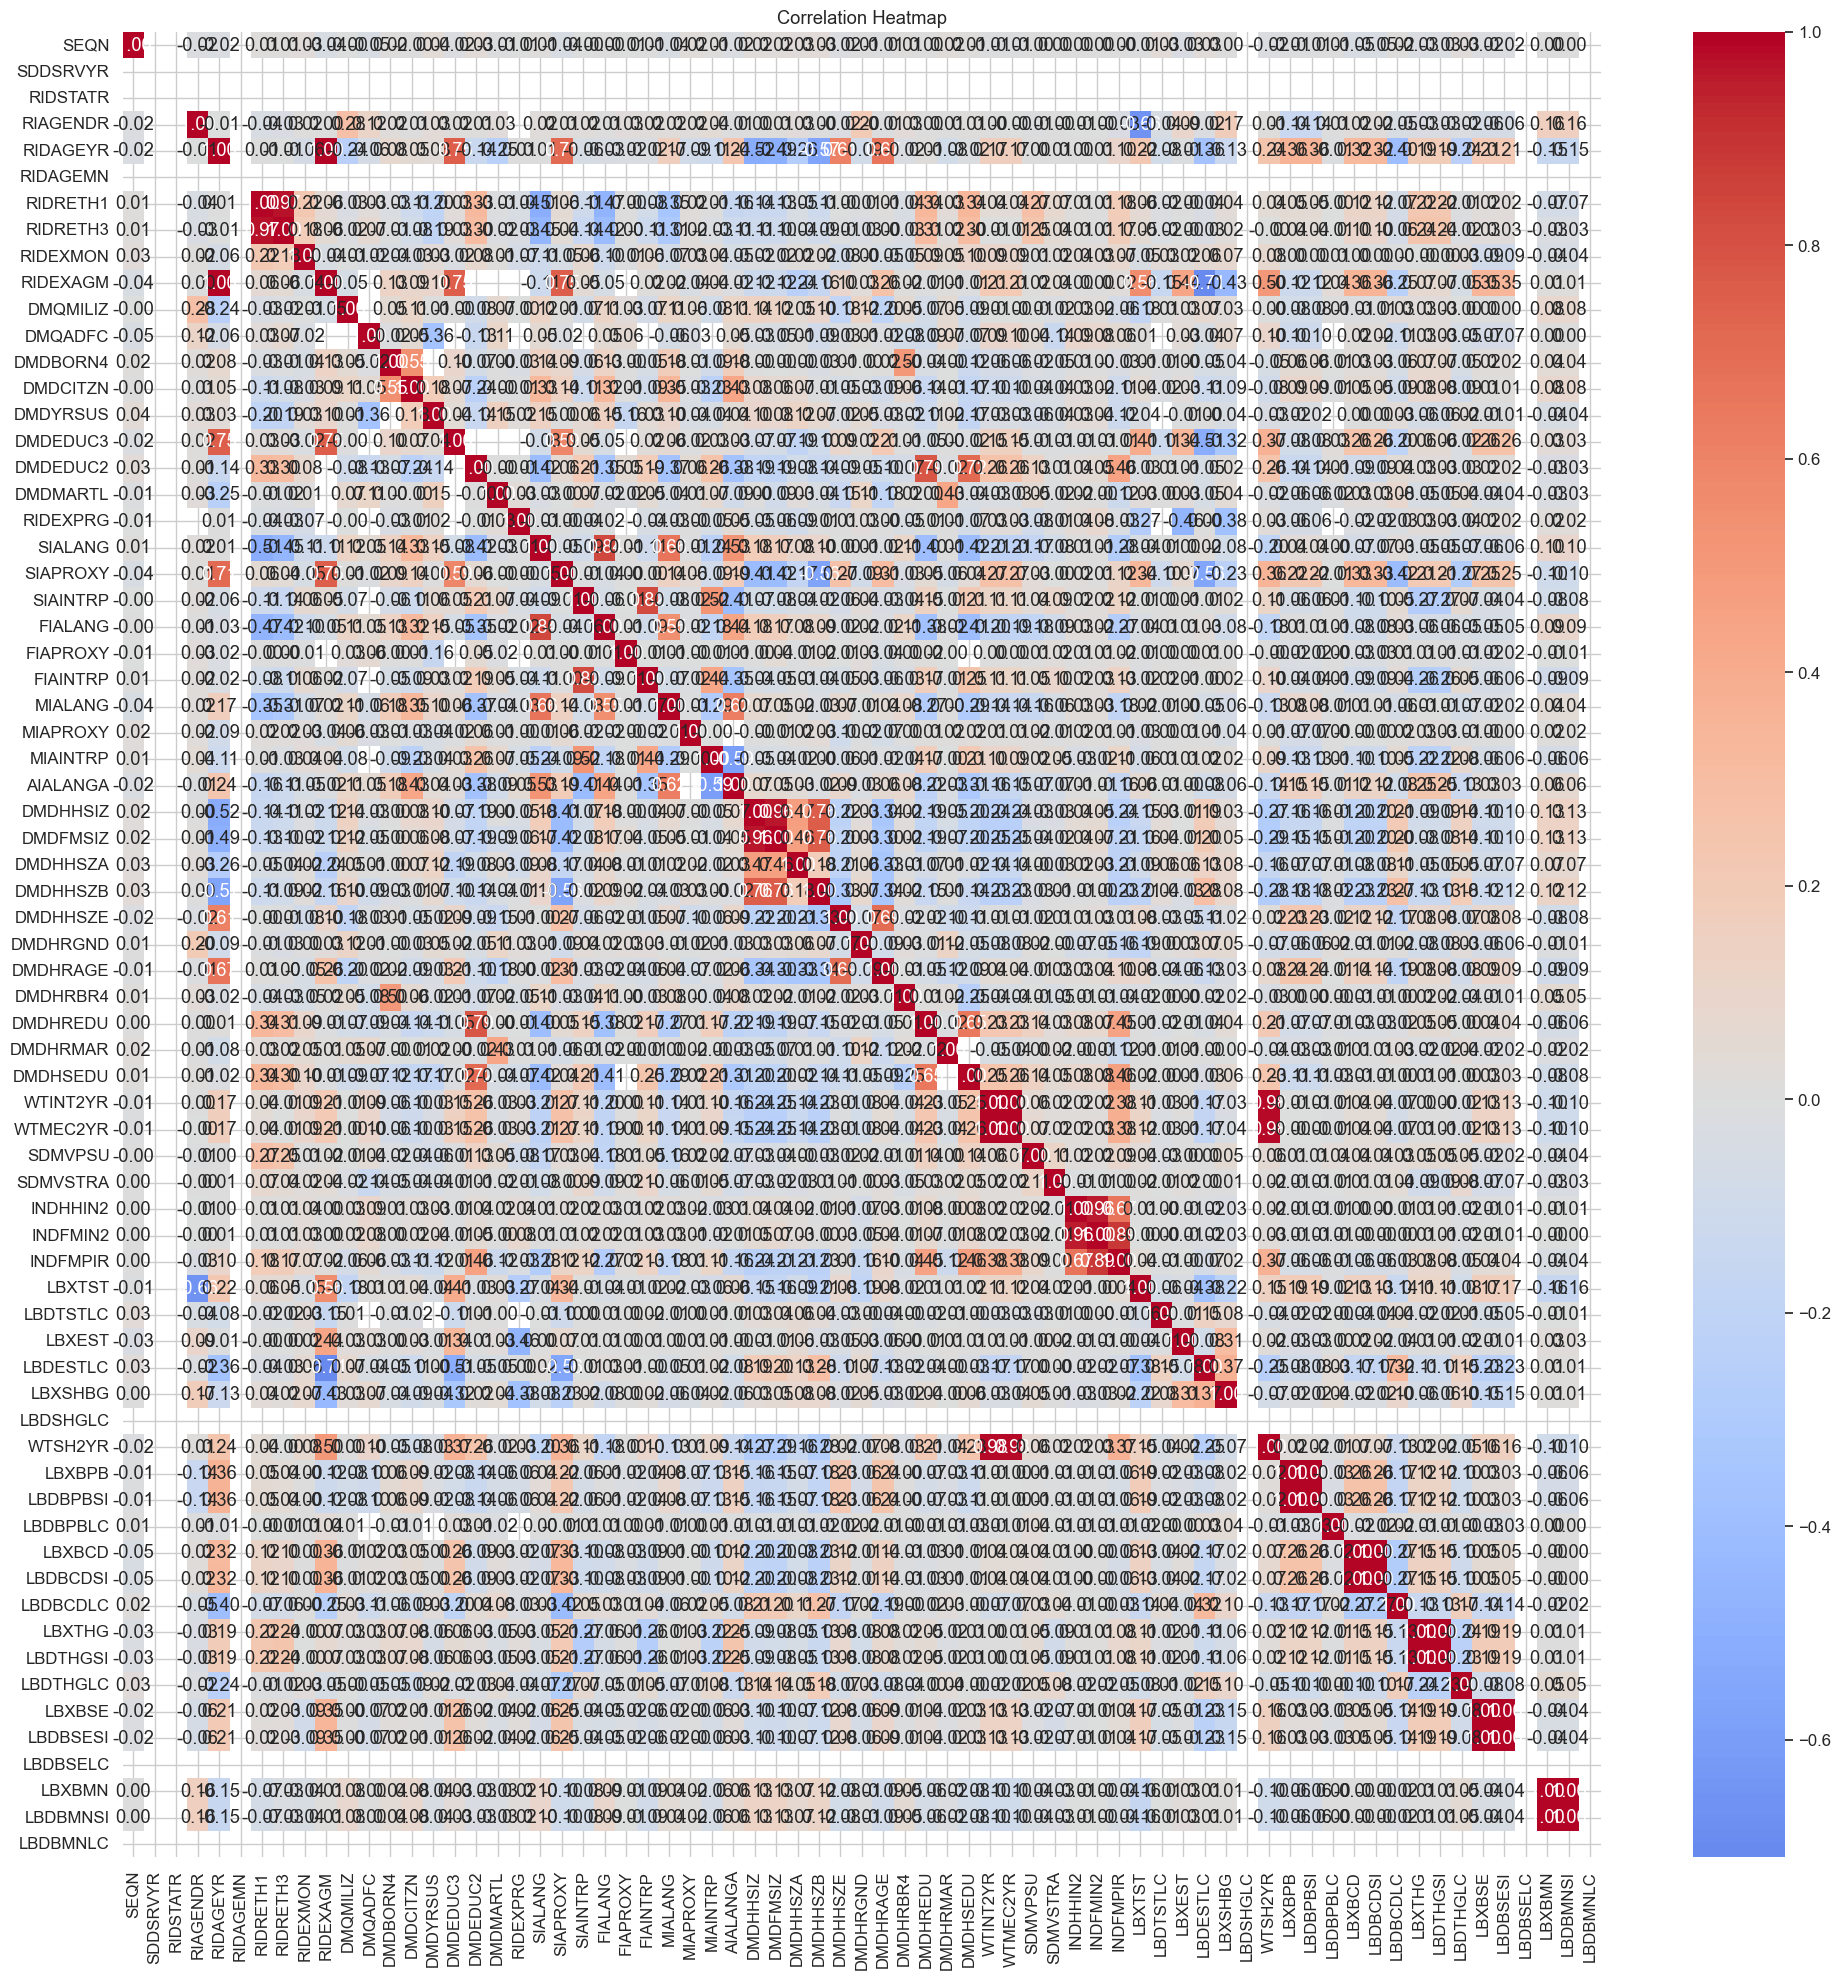

In [32]:
numeric_df = df_8.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [33]:
missing_cols = get_columns_with_missing_values(df_8, threshold=0.23)
df_9 = df_8.drop(missing_cols, axis=1)
df_desc[9] = "df_8 with columns with >30% missing values dropped"

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def plot_feature_importance(
    df, 
    target_col, 
    drop_cols=None, 
    model_type='regression', 
    test_size=0.2, 
    random_state=42, 
    top_n=15
):
    """
    Train a Random Forest model and plot top N feature importances.

    Parameters:
    - df: pandas DataFrame
    - target_col: column name to predict
    - drop_cols: list of columns to exclude from features (e.g. ID or other targets)
    - model_type: 'regression' or 'classification'
    - test_size: fraction of data for test split
    - random_state: random seed for reproducibility
    - top_n: number of top features to plot
    """

    if drop_cols is None:
        drop_cols = []

    global top_features
    top_features = []

    # Prepare X and y
    features = df.drop([target_col] + drop_cols, axis=1)
    target = df[target_col]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=test_size, random_state=random_state
    )

    # Choose model
    if model_type == 'regression':
        model = RandomForestRegressor(n_estimators=100, random_state=random_state)
    elif model_type == 'classification':
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier(n_estimators=100, random_state=random_state)
    else:
        raise ValueError("model_type must be 'regression' or 'classification'")

    # Fit model
    model.fit(X_train, y_train)

    # Feature importances
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    if top_n > len(indices):
        top_n = len(indices)
    
    # Limit to top_n features
    top_indices = indices[:top_n]
    top_features = [features.columns[i] for i in top_indices]
    top_importances = importances[top_indices]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.title(f"Top {top_n} Feature Importances - Target: {target_col}")
    plt.bar(range(top_n), top_importances, align="center")
    plt.xticks(range(top_n), top_features, rotation=90)
    plt.tight_layout()
    plt.show()


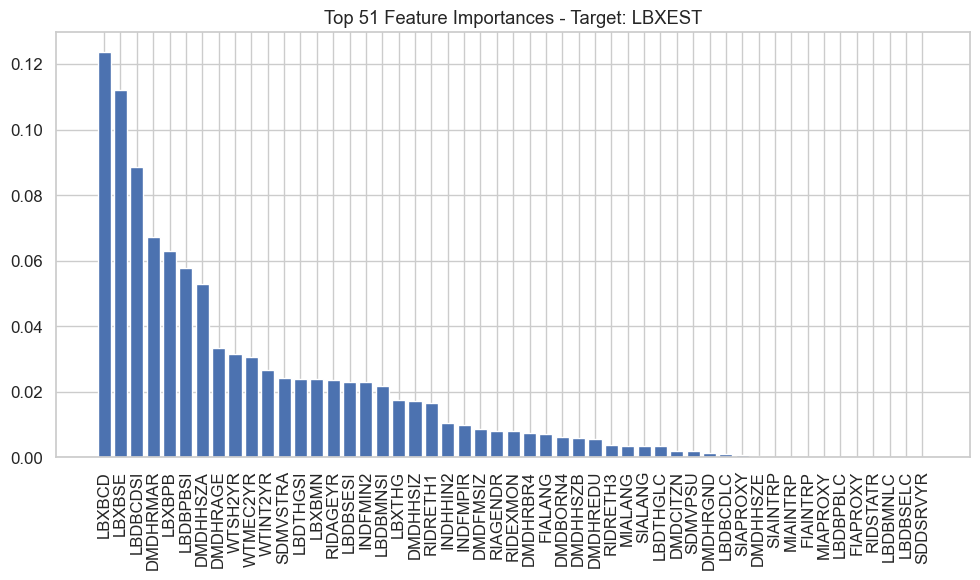

In [35]:
plot_feature_importance(
    df=df_9,
    target_col='LBXEST',
    drop_cols=['LBXTST', 'LBDTSTLC', 'LBDESTLC', 'LBXSHBG', 'LBDSHGLC', 'SEQN'],
    model_type='regression',
    top_n=60  # or change to any number like 10, 20
)


In [36]:
df_10 = df_9.copy()
df_10 = df_10.merge(rhq_df, on='SEQN', how='left')
df_desc[10] = "demo and rhq merged + pbcd right merged"
df_10.shape

(4059, 103)

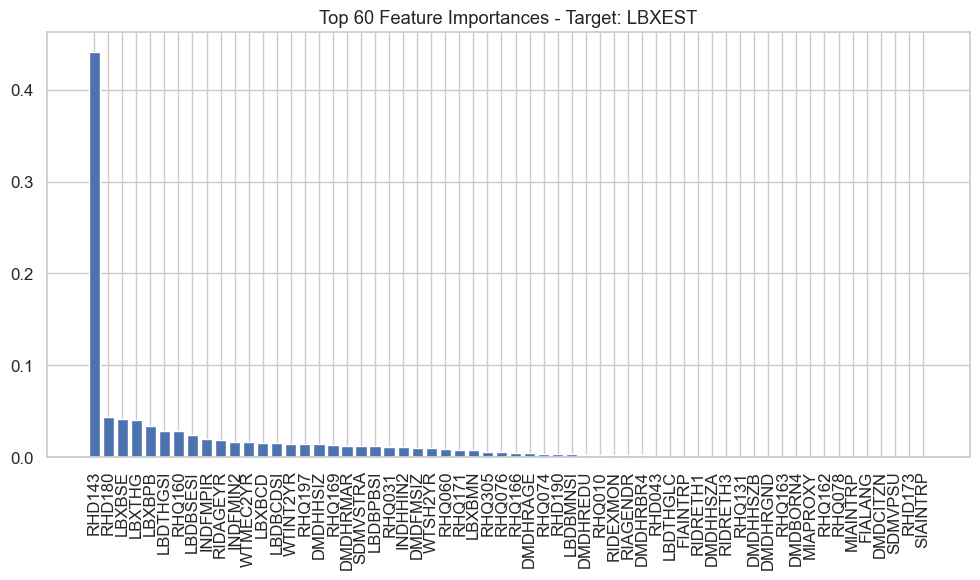

In [37]:
plot_feature_importance(
    df=df_10,
    target_col='LBXEST',
    drop_cols=['LBXTST', 'LBDTSTLC', 'LBDESTLC', 'LBXSHBG', 'LBDSHGLC', 'SEQN'],
    model_type='regression',
    top_n=60  
)

In [38]:
save_df_to_csv(df_10, 'df_10')
save_df_to_csv(df_9, 'df_9')

✅ DataFrame saved to: csvs\df_10.csv
✅ DataFrame saved to: csvs\df_9.csv


In [39]:
df_10['RHD143'].unique()

array([nan,  2.,  1.,  9.])

### Cleaning

In [40]:
df_3['RHQ010'].value_counts()

RHQ010
12.0     801
13.0     729
11.0     438
14.0     383
15.0     199
10.0     172
16.0     142
9.0      117
0.0       42
17.0      29
18.0      23
8.0       18
999.0     17
20.0       4
19.0       4
777.0      1
7.0        1
Name: count, dtype: int64

In [41]:
df_3[df_3['RHQ010'].isna() & df_3['RHQ031'].isna()]

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,RHQ010,RHQ020,RHQ031,RHD043,RHQ060,RHQ070,RHQ074,RHQ076,RHQ078,RHQ131,RHD143,RHQ160,RHQ162,RHQ163,RHQ166,RHQ169,RHQ172,RHD173,RHQ171,RHD180,RHD190,RHQ197,RHQ200,RHD280,RHQ291,RHQ305,RHQ332,RHQ420,RHQ540,RHQ542A,RHQ542B,RHQ542C,RHQ542D,RHQ554,RHQ560Q,RHQ560U,RHQ570,RHQ576Q,RHQ576U,RHQ580,RHQ586Q,RHQ586U,RHQ596,RHQ602Q,RHQ602U
12,83762,9,2,2,27,NaN,4,4,2.0,NaN,2.0,NaN,1,1.0,NaN,NaN,4.0,5.0,2.0,1,2.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,2,1,0,0,0,2,21,1.0,3.0,5.0,NaN,38387.341030,43424.328288,1,132,8.0,6.0,2.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,83776,9,2,2,58,NaN,1,1,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,5.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,3,3,0,1,1,1,68,1.0,5.0,1.0,5.0,21433.175988,21493.642170,2,128,14.0,14.0,3.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,83799,9,2,2,37,NaN,2,2,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,4.0,1.0,2.0,1,2.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,3,3,0,1,0,2,37,1.0,4.0,1.0,2.0,34128.785029,35348.435447,1,122,14.0,14.0,4.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,83802,9,2,2,29,NaN,1,1,2.0,NaN,2.0,NaN,1,1.0,NaN,NaN,3.0,1.0,2.0,1,2.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,3,0,0,2,29,1.0,3.0,1.0,NaN,21059.645511,26347.770743,2,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,83823,9,2,2,29,NaN,1,1,2.0,NaN,2.0,NaN,2,2.0,4.0,NaN,1.0,5.0,2.0,2,2.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,5,5,2,1,0,2,29,2.0,1.0,5.0,NaN,21819.187162,23096.462098,1,129,3.0,3.0,0.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,93619,9,2,2,44,NaN,5,6,1.0,NaN,2.0,NaN,2,2.0,2.0,NaN,2.0,1.0,2.0,1,2.0,1,1.0,2.0,2.0,NaN,NaN,NaN,NaN,7,7,2,0,0,1,37,2.0,4.0,1.0,4.0,13508.737701,13721.095669,2,121,14.0,14.0,1.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3447,93629,9,2,2,51,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,1.0,3.0,NaN,1,2.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,1,1,0,0,0,2,51,1.0,1.0,3.0,NaN,32774.990427,32570.984741,2,131,3.0,3.0,1.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3457,93662,9,2,2,17,NaN,3,3,1.0,210.0,2.0,NaN,1,1.0,NaN,11.0,NaN,NaN,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4,4,0,2,0,2,48,1.0,4.0,3.0,NaN,33660.215121,35302.973812,2,131,7.0,7.0,1.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [42]:
df_3[df_3['RHQ010'] == 0][['RHQ010', 'RIDAGEYR']]

,RHQ010,RIDAGEYR
38,0.0,13
45,0.0,12
53,0.0,14
344,0.0,12
475,0.0,14
571,0.0,21
682,0.0,13
694,0.0,12
705,0.0,12
777,0.0,12


In [43]:
df_3[pd.isna(df_3['RHQ010'])][['RHQ010', 'RIDAGEYR']]['RIDAGEYR'].unique()

array([27, 58, 37, 29, 49, 79, 44, 14, 26, 60, 61, 46, 12, 28, 42, 43, 36,
       31, 35, 62, 24, 30, 50, 47, 48, 71, 15, 20, 51, 70, 74, 17, 22, 72,
       55, 34, 16, 18, 33, 54, 40, 66, 80, 52, 67, 13, 21, 25, 38, 78, 63,
       23, 39, 69, 45, 56, 53, 32, 41, 65, 77, 57, 64, 68, 76, 19],
      dtype=int64)

### Cleaning RH

In [44]:
import pandas as pd
import numpy as np

def clean_rhq010_column(df):
    df = df.copy()

    # Automatically find all RHQ columns
    rhq_columns = [col for col in df.columns if col.startswith("RHQ") or col.startswith("RHD")]

    # Step 1: Clean RHQ010 into readable categories
    def clean_rhq010(val):
        if pd.isna(val):
            return np.nan
        if val == -1000:
            return 0
        if val in [777, 999]:
            return 1000
        return val  # valid age

    # Add new cleaned column
    df['RHQ010_cleaned'] = df['RHQ010'].apply(clean_rhq010)

    # Step 2: For rows where 'not_started', fill all other RHQ/RHD columns as 'pass_1'
    not_started_mask = df['RHQ010_cleaned'] == 'not_started'
    rhq_cols_to_pass = [col for col in rhq_columns if col != 'RHQ010']

    for col in rhq_cols_to_pass:
        df.loc[not_started_mask & df[col].isna(), col] = 'pass_1'

    return df


In [45]:
import re

def apply_skip_patterns(df, skip_rules):
    df = df.copy()
    
    # Identify RHQ/RHD columns in order
    rhq_cols = [col for col in df.columns if re.match(r'^RH[QD]\d{3}[A-Z]*$', col)]
    rhq_col_positions = {col: idx for idx, col in enumerate(rhq_cols)}
    
    pass_id = 1

    for trigger_col, skip_map in skip_rules.items():
        for trigger_val, skip_to in skip_map.items():
            if trigger_col not in rhq_col_positions:
                continue

            start_idx = rhq_col_positions[trigger_col]
            mask = df[trigger_col] == trigger_val

            # Determine skip range
            if skip_to == "END":
                skipped_cols = rhq_cols[start_idx + 1:]
            else:
                if skip_to not in rhq_col_positions:
                    continue
                end_idx = rhq_col_positions[skip_to]
                if end_idx <= start_idx:
                    continue
                skipped_cols = rhq_cols[start_idx + 1:end_idx]
            
            # Fill NaNs with pass_k in skipped columns
            for col in skipped_cols:
                df[col] = df[col].astype('object')  # Ensure column can hold strings
                df.loc[mask & df[col].isna(), col] = f"pass_{pass_id}"

            
            pass_id += 1
    
    return df


In [46]:
skip_rules = {
    "RHQ010": {
        0: "END"  
    },
    "RHQ031": {
        1: "RHQ060",  
        7: "RHQ060",  
        9: "RHQ060"   
    },
    "RHQ131": {
        2: "RHD280",  
        7: "RHD280",  
        9: "RHD280"   
    },
    
    "RHQ162": {
        2: "RHQ166",
        3: "RHQ166",
        7: "RHQ166",  
        9: "RHQ166"   
    },
    "RHQ172": {
        2: "RHQ171",  
        7: "RHQ171",  
        9: "RHQ171"
    },
    "RHD280": {
        2: "RHQ305",  
        7: "RHQ305",  
        9: "RHQ305"
    },
    "RHQ305": {
        2: "RHQ420",  
        7: "RHQ420",  
        9: "RHQ420"   
    },
    "RHQ540": {
        2: "END", 
        7: "END", 
        9: "END"  
    },
    "RHQ554": {
        2: "RHQ570", 
        7: "RHQ570", 
        9: "RHQ570"  
    },
    "RHQ570": {
        2: "RHQ580",  
        7: "RHQ580",  
        9: "RHQ580" 
    },
    "RHQ580": {
        2: "RHQ596",  
        7: "RHQ596",
        9: "RHQ596"   
    },
    "RHQ596": {
        2: "END",  
        7: "END",
        9: "END"   
    }
}

In [47]:
df_11 = rhq_df.copy()
df_11 = apply_skip_patterns(df_11, skip_rules)
df_desc[11] = "Applied skip patterns to RHQ/RHD columns"

In [48]:
save_df_to_csv(df_11, 'df_11')

✅ DataFrame saved to: csvs\df_11.csv


In [49]:
import re

def apply_skip_patterns_numeric(df, skip_rules, pass_start=500):
    df = df.copy()
    
    # Identify RHQ/RHD columns in order
    rhq_cols = [col for col in df.columns if re.match(r'^RH[QD]\d{3}[A-Z]*$', col)]
    rhq_col_positions = {col: idx for idx, col in enumerate(rhq_cols)}
    
    pass_id = 1
    pass_map = {}  # Store pass_k -> numeric value mapping

    for trigger_col, skip_map in skip_rules.items():
        for trigger_val, skip_to in skip_map.items():
            if trigger_col not in rhq_col_positions:
                continue

            start_idx = rhq_col_positions[trigger_col]
            mask = df[trigger_col] == trigger_val

            # Determine skip range
            if skip_to == "END":
                skipped_cols = rhq_cols[start_idx + 1:]
            else:
                if skip_to not in rhq_col_positions:
                    continue
                end_idx = rhq_col_positions[skip_to]
                if end_idx <= start_idx:
                    continue
                skipped_cols = rhq_cols[start_idx + 1:end_idx]
            
            # Generate numeric pass value
            pass_label = f"pass_{pass_id}"
            pass_numeric = pass_start + pass_id - 1
            pass_map[pass_label] = pass_numeric

            # Apply to relevant columns
            for col in skipped_cols:
                df.loc[mask & df[col].isna(), col] = pass_label
            
            pass_id += 1

    # Final step: replace all pass_k with numeric codes
    df.replace(pass_map, inplace=True)
    df = df.infer_objects(copy=False)

    return df


In [50]:
df_12 = df_11.copy()
df_12 = apply_skip_patterns_numeric(df_12, skip_rules)

C:\Users\USER\AppData\Local\Temp\ipykernel_11928\387585571.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(pass_map, inplace=True)


In [51]:
df_desc[12] = "Applied numeric skip patterns to RHQ/RHD columns"

In [52]:
save_df_to_csv(df_12, 'df_12')

✅ DataFrame saved to: csvs\df_12.csv


In [53]:
df_13 = df_9.copy()
df_13 = df_13.merge(df_12, on='SEQN', how='left')
df_13.shape

(4059, 103)

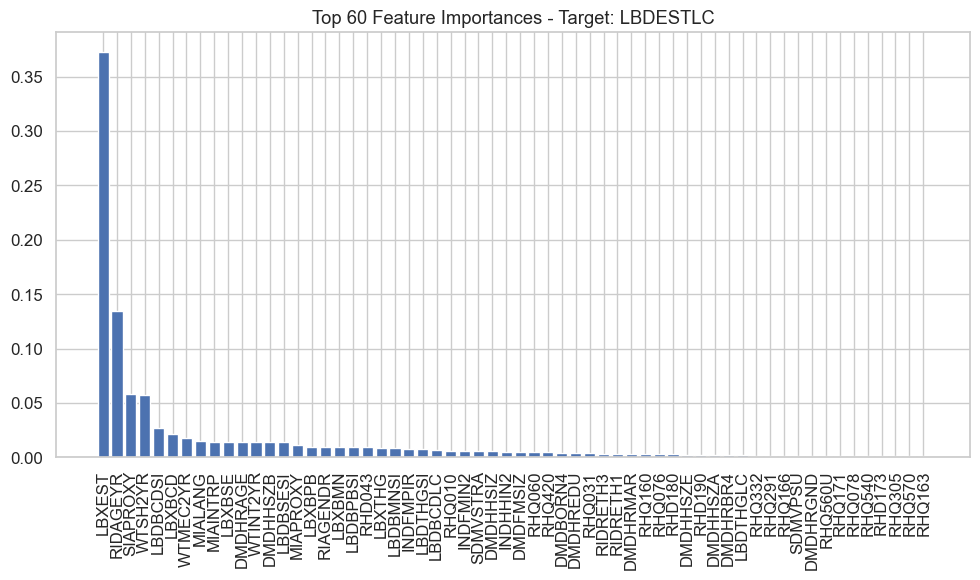

In [54]:
plot_feature_importance(
    df=df_13,
    target_col='LBDESTLC',
    drop_cols=['LBXTST', 'LBDTSTLC', 'LBDESTLC', 'LBXSHBG', 'LBDSHGLC', 'SEQN'],
    model_type='classification',
    top_n=60  
)

In [55]:
save_df_to_csv(df_13, 'df_13')

✅ DataFrame saved to: csvs\df_13.csv


In [56]:
df_13.columns

Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'RIDRETH3', 'RIDEXMON', 'DMDBORN4', 'DMDCITZN',
       ...
       'RHQ560U', 'RHQ570', 'RHQ576Q', 'RHQ576U', 'RHQ580', 'RHQ586Q',
       'RHQ586U', 'RHQ596', 'RHQ602Q', 'RHQ602U'],
      dtype='object', length=103)

In [57]:
def mark_male_nans(df, rhq_prefixes=('RHQ', 'RHD'), male_code=300):
    df = df.copy()
    
    # Identify RHQ/RHD columns
    rhq_cols = [col for col in df.columns if any(col.startswith(prefix) for prefix in rhq_prefixes)]
    
    # Mask: rows where gender is male (RIAGENDR == 1)
    male_mask = df['RIAGENDR'] == 1
    
    # Replace NaNs in RHQ columns for male rows with the code
    for col in rhq_cols:
        df.loc[male_mask & df[col].isna(), col] = male_code

    return df


In [58]:
df_14 = df_13.copy()
df_14 = mark_male_nans(df_13)
save_df_to_csv(df_14, 'df_14')

✅ DataFrame saved to: csvs\df_14.csv


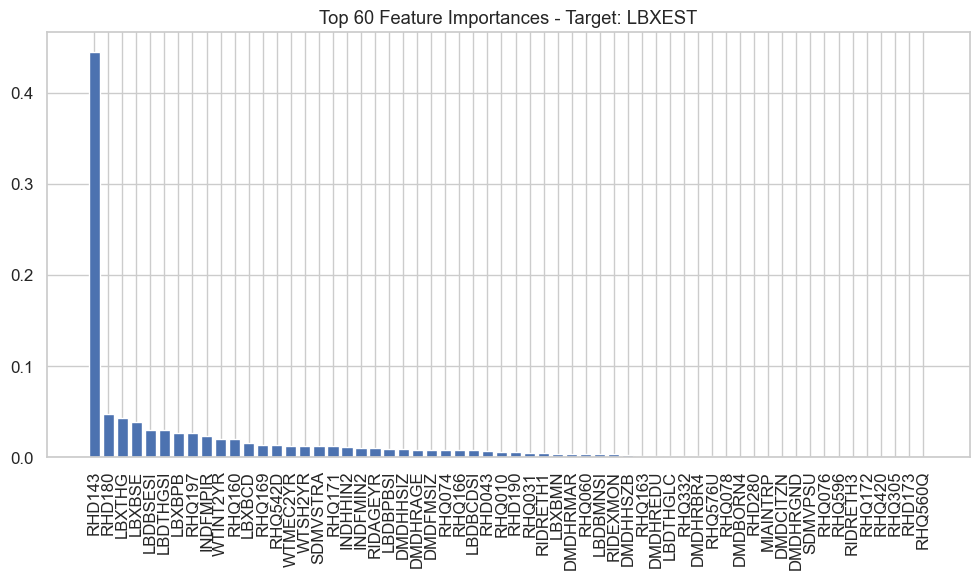

In [59]:
plot_feature_importance(
    df=df_14,
    target_col='LBXEST',
    drop_cols=['LBXTST', 'LBDTSTLC', 'LBDESTLC', 'LBXSHBG', 'LBDSHGLC', 'SEQN',],
    model_type='regression',
    top_n=60
)

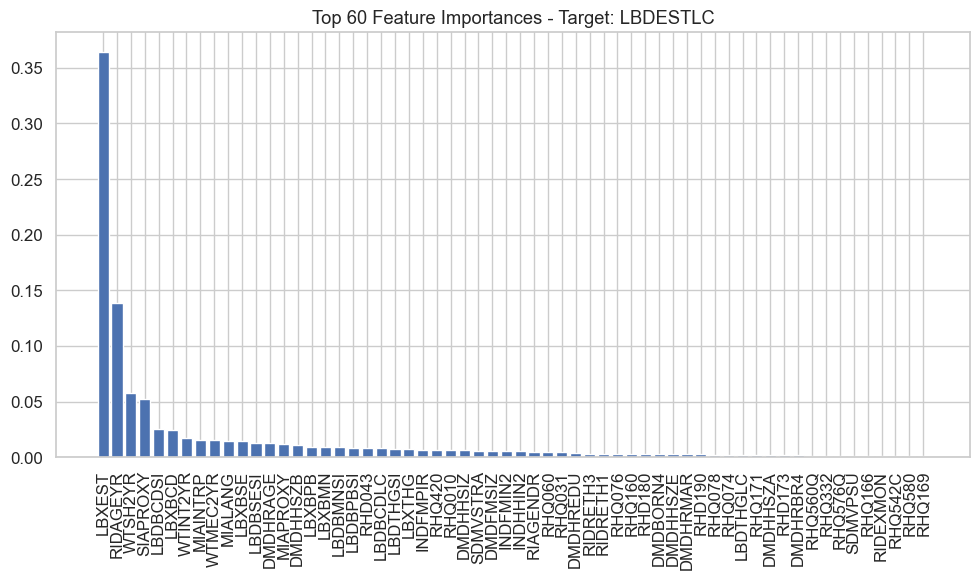

In [60]:
plot_feature_importance(
    df=df_14,
    target_col='LBDESTLC',
    drop_cols=['LBXTST', 'LBDTSTLC', 'LBDESTLC', 'LBXSHBG', 'LBDSHGLC', 'SEQN'],
    model_type='classification',
    top_n=60  
)

In [61]:
def print_unique_values(df):
    for col in df.columns:
        unique_vals = df[col].unique()
        print(f"\nColumn: {col} : {len(unique_vals)} unique values")
        # print(f"Unique ({len(unique_vals)}): {unique_vals}")

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def transform_numeric_columns(df, method='standard', min_unique_vals=20):
    """
    Parameters:
        df: pandas.DataFrame
        method: 'standard' (Z-score) or 'minmax' (0–1 normalization)
        min_unique_vals: only transform columns with more than this many unique values
    Returns:
        df_transformed: DataFrame with transformed numeric columns
    """
    df = df.copy()
    scaler = StandardScaler() if method == 'standard' else MinMaxScaler()
    
    for col in df.select_dtypes(include='number').columns:
        if df[col].nunique() > min_unique_vals:
            reshaped = df[col].values.reshape(-1, 1)
            df[col] = scaler.fit_transform(reshaped)
    
    return df

In [63]:
df_15 = transform_numeric_columns(df_14, method='minmax')  # Normalize
# or:
df_16 = transform_numeric_columns(df_14, method='standard')  # Standardize

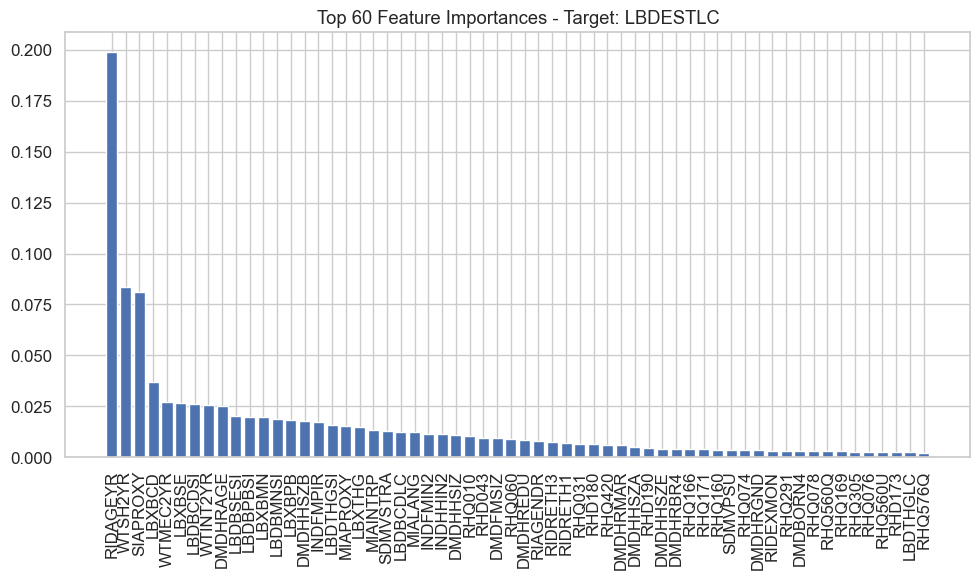

In [64]:
plot_feature_importance(
    df=df_15,
    target_col='LBDESTLC',
    drop_cols=['LBXTST', 'LBDTSTLC', 'LBDESTLC', 'LBXSHBG', 'LBDSHGLC', 'SEQN', 'LBXEST'],
    model_type='classification',
    top_n=60  
)

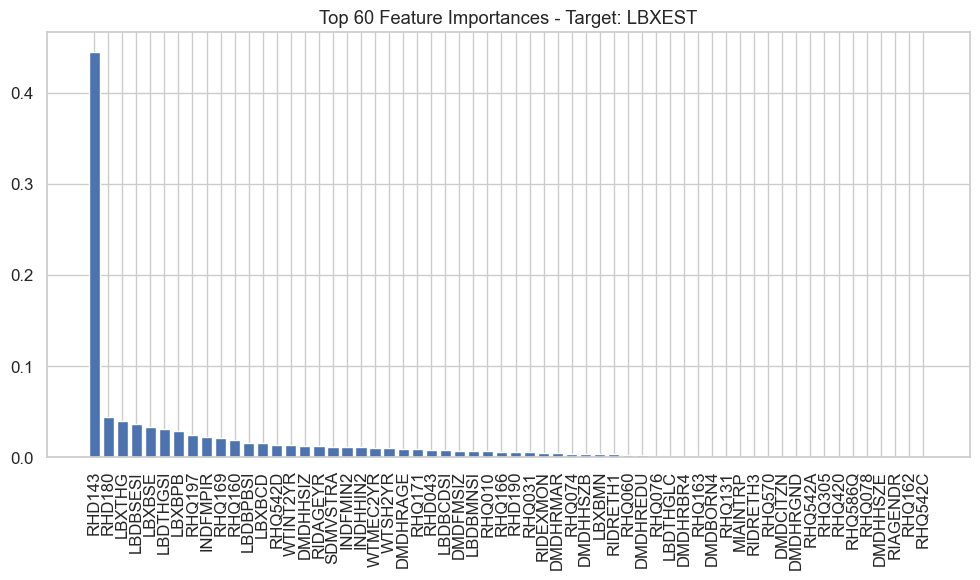

In [65]:
plot_feature_importance(
    df=df_15,
    target_col='LBXEST',
    drop_cols=['LBXTST', 'LBDTSTLC', 'LBDESTLC', 'LBXSHBG', 'LBDSHGLC', 'SEQN', 'LBXEST'],
    model_type='regression',
    top_n=60
)

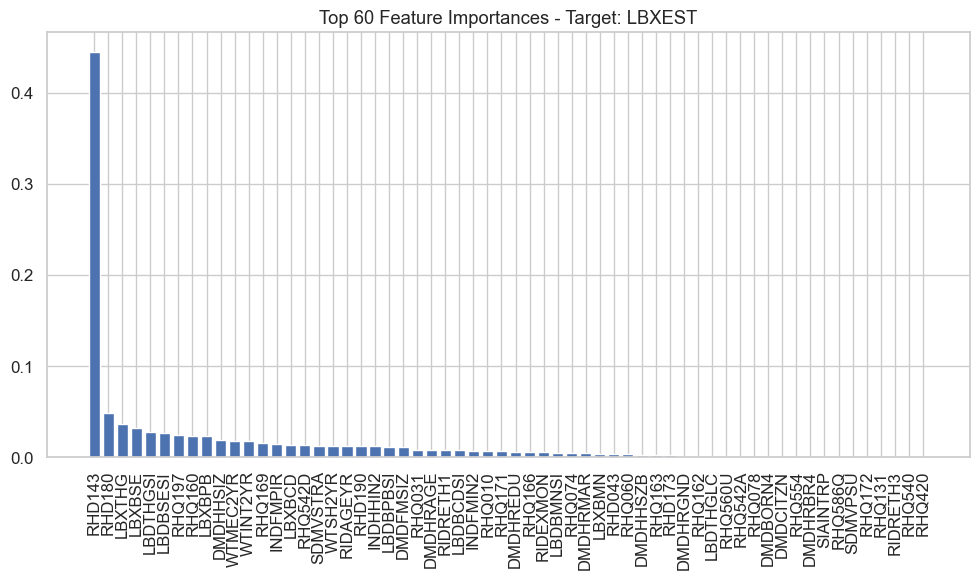

In [66]:
plot_feature_importance(
    df=df_16,
    target_col='LBXEST',
    drop_cols=['LBXTST', 'LBDTSTLC', 'LBDESTLC', 'LBXSHBG', 'LBDSHGLC', 'SEQN',],
    model_type='regression',
    top_n=60
)

In [67]:
tst_df.columns

Index(['SEQN', 'LBXTST', 'LBDTSTLC', 'LBXEST', 'LBDESTLC', 'LBXSHBG',
       'LBDSHGLC'],
      dtype='object')

### CLEANING DEMO DATA

In [68]:
df_17 = demo_df.copy()
df_desc[17] = "demo_df copy for df_17"

In [69]:
demo_df[demo_df['RIDAGEYR'] < 5]

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
7,83739,9,2,1,4,NaN,3,3,2.0,54.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,5,5,2,1,0,2,35,1.0,5.0,1.0,5.0,44749.889547,46173.307234,2,124,15.0,15.0,4.22
8,83740,9,2,1,1,13.0,2,2,2.0,14.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,1,1.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,7,7,2,2,0,2,48,2.0,9.0,5.0,NaN,9891.944044,10963.313710,1,119,77.0,77.0,NaN
14,83746,9,2,2,4,NaN,5,6,1.0,52.0,NaN,NaN,2,2.0,2.0,NaN,NaN,NaN,NaN,1,1.0,1,1.0,2.0,1.0,NaN,NaN,NaN,NaN,4,4,1,1,0,1,45,NaN,NaN,1.0,4.0,10998.012047,11273.997898,2,129,12.0,12.0,NaN
16,83748,9,2,1,3,NaN,4,4,2.0,41.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,6,6,3,0,0,2,54,1.0,4.0,5.0,NaN,10988.317325,11184.295239,2,131,6.0,6.0,0.94
28,83760,9,2,2,3,NaN,4,4,2.0,38.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,6,6,2,2,0,2,31,1.0,3.0,77.0,NaN,8862.399321,8919.396129,2,126,7.0,7.0,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,93678,9,2,2,1,18.0,3,3,2.0,18.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,3,3,1,0,0,1,29,1.0,4.0,1.0,5.0,17823.018496,17460.938662,2,126,7.0,7.0,1.79
9951,93683,9,2,1,3,NaN,1,1,1.0,40.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,2,1.0,2,2.0,2.0,2.0,NaN,NaN,NaN,NaN,2,2,1,0,0,2,37,2.0,5.0,5.0,NaN,12977.535438,13384.933463,1,120,6.0,6.0,1.88
9956,93688,9,2,1,1,12.0,3,3,2.0,13.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,3,3,1,0,0,2,25,1.0,2.0,1.0,2.0,18372.453480,18899.476723,2,123,99.0,99.0,NaN
9960,93692,9,2,1,1,12.0,5,6,2.0,13.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,7,7,2,1,0,1,43,1.0,3.0,1.0,3.0,9217.165950,9350.771096,1,130,15.0,15.0,3.74


In [70]:
def fix_demo_advanced(df):
    df = df.copy()

    # Precompute age and gender filters
    age = df['RIDAGEYR']
    is_male = df['RIAGENDR'] == 1
    is_female = df['RIAGENDR'] == 2

    # ----------------------------
    # RIDAGEMN: Only valid for age ≤ 2, others get age in months
    # ----------------------------
    df['RIDAGEMN'] = df.apply(
        lambda row: row['RIDAGEMN'] if row['RIDAGEYR'] <= 2 else row['RIDAGEYR'] * 12,
        axis=1
    )

    # ----------------------------
    # Combine DMDEDUC3 (6–19) and DMDEDUC2 (20+) into a unified education level column
    # ----------------------------
    df['COMBINED_EDUC'] = df['DMDEDUC3']
    # Fill missing values in DMDEDUC3 using 300+DMDEDUC2
    mask = df['COMBINED_EDUC'].isna() & df['DMDEDUC2'].notna()
    df.loc[mask, 'COMBINED_EDUC'] = df.loc[mask, 'DMDEDUC2'] + 300
    # df['COMBINED_EDUC'] = df['DMDEDUC3']
    # df.loc[age >= 20, 'COMBINED_EDUC'] = df['DMDEDUC2']

    # ----------------------------
    # DMQMILIZ / DMQADFC: Military service — valid if age ≥ 17
    # ----------------------------
    df.loc[age < 17, ['DMQMILIZ', 'DMQADFC']] = 300

    # ----------------------------
    # DMDEDUC3: Children 6–19 only
    # ----------------------------
    df.loc[(age < 6) | (age > 19), 'DMDEDUC3'] = 300

    # ----------------------------
    # DMDEDUC2: Adults 20+ only
    # ----------------------------
    df.loc[age < 20, 'DMDEDUC2'] = 300

    # ----------------------------
    # DMDMARTL: Marital status — only for 16+ (modified)
    # ----------------------------
    df.loc[age < 16, 'DMDMARTL'] = 300

    # ----------------------------
    # RIDEXPRG: Pregnancy test – only for females age 20–44
    # Label males: 301, young females: 302, older females: 303
    # ----------------------------
    df.loc[is_male, 'RIDEXPRG'] = 301
    df.loc[is_female & (age < 20), 'RIDEXPRG'] = 302
    df.loc[is_female & (age > 44), 'RIDEXPRG'] = 303

    # ----------------------------
    # MEC interview — age ≥ 8
    # ----------------------------
    df.loc[age < 8, ['MIALANG', 'MIAPROXY', 'MIAINTRP']] = 300

    # ----------------------------
    # ACASI Interview: age 8–69
    # ----------------------------
    df.loc[(age < 8) | (age > 69), 'AIALANGA'] = 300

    # ----------------------------
    # SP Interview Language and Proxy: skip if age < 1
    # ----------------------------
    df.loc[age < 1, ['SIALANG', 'SIAPROXY', 'SIAINTRP']] = 300
    df.loc[age < 1, ['FIALANG', 'FIAPROXY', 'FIAINTRP']] = 300

    # ----------------------------
    # DMDHSEDU (Spouse’s education): only if married (DMDMARTL == 1)
    # ----------------------------
    df.loc[df['DMDMARTL'] != 1, 'DMDHSEDU'] = 300

    # ----------------------------
    # Household reference fields: assign 300 if missing
    # ----------------------------
    hh_ref_cols = ['DMDHRGND', 'DMDHRAGE', 'DMDHRBR4', 'DMDHREDU', 'DMDHRMAR']
    for col in hh_ref_cols:
        df.loc[df[col].isna(), col] = 300

    return df

In [71]:
def fix_demo_advanced(df):
    df = df.copy()

    # Precompute age and gender filters
    age = df['RIDAGEYR']
    is_male = df['RIAGENDR'] == 1
    is_female = df['RIAGENDR'] == 2

    # ----------------------------
    # RIDAGEMN: Only valid for age ≤ 2, others get age in months
    # ----------------------------
    df['RIDAGEMN'] = df.apply(
        lambda row: row['RIDAGEMN'] if row['RIDAGEYR'] <= 2 else row['RIDAGEYR'] * 12,
        axis=1
    )

    # ----------------------------
    # Combine DMDEDUC3 (6–19) and DMDEDUC2 (20+) into a unified education level column
    # ----------------------------
    df['COMBINED_EDUC'] = df['DMDEDUC3']
    # Fill missing values in DMDEDUC3 using 300+DMDEDUC2
    mask = df['COMBINED_EDUC'].isna() & df['DMDEDUC2'].notna()
    df.loc[mask, 'COMBINED_EDUC'] = df.loc[mask, 'DMDEDUC2'] + 300

    # ----------------------------
    # DMQMILIZ / DMQADFC: Military service — valid if age ≥ 17
    # ----------------------------
    df.loc[age < 17, ['DMQMILIZ', 'DMQADFC']] = 300

    # ----------------------------
    # DMDEDUC3: Children 6–19 only
    # ----------------------------
    df.loc[(age < 6) | (age > 19), 'DMDEDUC3'] = 300

    # ----------------------------
    # DMDEDUC2: Adults 20+ only
    # ----------------------------
    df.loc[age < 20, 'DMDEDUC2'] = 300

    # ----------------------------
    # DMDMARTL: Marital status — only for 16+ (modified)
    # ----------------------------
    df.loc[age < 16, 'DMDMARTL'] = 300

    # ----------------------------
    # RIDEXPRG: Pregnancy test – only for females age 20–44
    # ----------------------------
    df.loc[is_male, 'RIDEXPRG'] = 301
    df.loc[is_female & (age < 20), 'RIDEXPRG'] = 302
    df.loc[is_female & (age > 44), 'RIDEXPRG'] = 303

    # ----------------------------
    # MEC interview — age ≥ 8
    # ----------------------------
    df.loc[age < 8, ['MIALANG', 'MIAPROXY', 'MIAINTRP']] = 300

    # ----------------------------
    # ACASI Interview: age 8–69
    # ----------------------------
    df.loc[(age < 8) | (age > 69), 'AIALANGA'] = 300

    # ----------------------------
    # SP Interview Language and Proxy: skip if age < 1
    # ----------------------------
    df.loc[age < 1, ['SIALANG', 'SIAPROXY', 'SIAINTRP']] = 300
    df.loc[age < 1, ['FIALANG', 'FIAPROXY', 'FIAINTRP']] = 300

    # ----------------------------
    # DMDHSEDU (Spouse’s education): only if married (DMDMARTL == 1)
    # ----------------------------
    df.loc[df['DMDMARTL'] != 1, 'DMDHSEDU'] = 300

    # ----------------------------
    # Household reference fields: assign 300 if missing
    # ----------------------------
    hh_ref_cols = ['DMDHRGND', 'DMDHRAGE', 'DMDHRBR4', 'DMDHREDU', 'DMDHRMAR']
    for col in hh_ref_cols:
        df.loc[df[col].isna(), col] = 300

    # ----------------------------
    # Impute DMDYRSUS using DMDCITZN, DMDBORN4, and RIDAGEYR
    # ----------------------------
    def age_to_dmdyrsus(years):
        if pd.isna(years): return np.nan
        if years < 1: return 1
        elif years < 5: return 2
        elif years < 10: return 3
        elif years < 15: return 4
        elif years < 20: return 5
        elif years < 30: return 6
        elif years < 40: return 7
        elif years < 50: return 8
        else: return 9

    mask_na = df['DMDYRSUS'].isna()
    born_us = df['DMDBORN4'] == 1
    not_born_us = df['DMDBORN4'] == 2
    citizen = df['DMDCITZN'] == 1
    non_citizen = df['DMDCITZN'] == 2

    # Case 1: Born in US → years in US = age
    born_us_mask = mask_na & born_us
    df.loc[born_us_mask, 'DMDYRSUS'] = age[born_us_mask].apply(age_to_dmdyrsus)

    # Case 2: Not born in US but citizen → assume arrived at 5 y/o
    citizen_nonborn = mask_na & citizen & not_born_us
    df.loc[citizen_nonborn, 'DMDYRSUS'] = (age[citizen_nonborn] - 5).clip(lower=0).apply(age_to_dmdyrsus)

    # Case 3: Not a citizen → assume recent arrival
    noncitizen_mask = mask_na & non_citizen
    df.loc[noncitizen_mask, 'DMDYRSUS'] = (age[noncitizen_mask] - 5).clip(lower=0).apply(age_to_dmdyrsus)

    return df


In [72]:
df_17 = fix_demo_advanced(df_17)
df_desc[17] = "Fixed demo_df advanced fields"

In [73]:
df_18 = df_17.copy()
df_18 = df_18.merge(tst_df, on='SEQN', how='right')
df_18 = df_18.merge(pbcd_df, on='SEQN', how='right')
df_18 = df_18.merge(df_12, on='SEQN', how='left')
df_18.shape

(5815, 115)

In [74]:
save_df_to_csv(df_18, 'df_18')

✅ DataFrame saved to: csvs\df_18.csv


In [ ]:
target_columns = [
    #'LBXTST',      
    'LBXEST',      # Estradiol (regression)
    #'LBXSHBG',     # SHBG (regression)
    #'LBDTSTLC',    # Testosterone Status (classifi cation)
    #'LBDESTLC',    # Estradiol Status (classification)
    #'LBDSHGLC',    # SHBG Status (classification)
]

# Drop rows that have missing values in ANY of the target columns
df_19 = df_18.dropna(subset=target_columns)

# Optional: Reset index after dropping
df_19 = df_19.reset_index(drop=True)
df_desc[19] = "df_18 with rows with missing target columns dropped"
df_19.shape

(4059, 115)

In [76]:
save_df_to_csv(df_19, 'df_19')

✅ DataFrame saved to: csvs\df_19.csv


In [77]:
df_20 = df_19.copy()
df_20 = mark_male_nans(df_20)

In [78]:
save_df_to_csv(df_20, 'df_20')

✅ DataFrame saved to: csvs\df_20.csv


In [79]:
df_20.shape

(4059, 115)

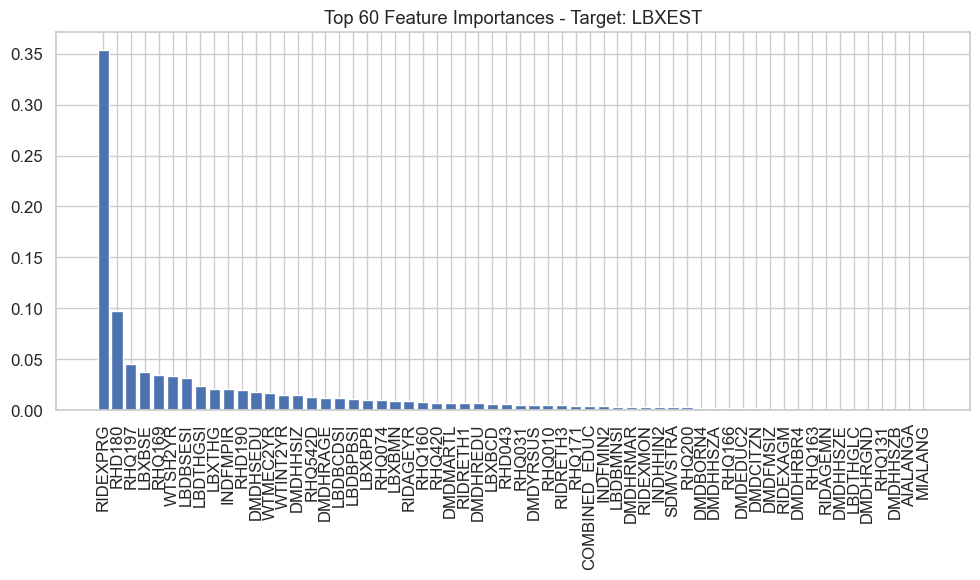

In [80]:
plot_feature_importance(
    df=df_20,
    target_col='LBXEST',
    drop_cols=['LBXTST', 'LBDTSTLC', 'LBDESTLC', 'LBXSHBG', 'LBDSHGLC', 'SEQN', 'LBXEST', 'RHD143'],
    model_type='regression',
    top_n=60  
)

In [81]:
df_21 = df_17.copy()
df_21 = df_21.merge(tst_df, on='SEQN', how='right')
df_21 = df_21.merge(pbcd_df, on='SEQN', how='right')
df_22 = df_21.merge(df_12[['RHQ160', 'RHQ074','RHQ031','RHD043','RHQ010','RHQ420','SEQN']], on='SEQN', how='left')

In [82]:
save_df_to_csv(df_21, 'df_21')
save_df_to_csv(df_22, 'df_22')

✅ DataFrame saved to: csvs\df_21.csv
✅ DataFrame saved to: csvs\df_22.csv


In [83]:
target_columns = [
    #'LBXTST',      
    'LBXEST',      # Estradiol (regression)
    #'LBXSHBG',     # SHBG (regression)
    #'LBDTSTLC',    # Testosterone Status (classification)
    #'LBDESTLC',    # Estradiol Status (classification)
    #'LBDSHGLC',    # SHBG Status (classification)
]

# Drop rows that have missing values in ANY of the target columns
df_21 = df_21.dropna(subset=target_columns)

# Optional: Reset index after dropping
df_21 = df_21.reset_index(drop=True)
df_desc[21] = "df_21 with rows with missing target columns dropped"
df_21.shape

(4059, 70)

In [84]:
target_columns = [
    #'LBXTST',      
    'LBXEST',      # Estradiol (regression)
    #'LBXSHBG',     # SHBG (regression)
    #'LBDTSTLC',    # Testosterone Status (classification)
    #'LBDESTLC',    # Estradiol Status (classification)
    #'LBDSHGLC',    # SHBG Status (classification)
]

# Drop rows that have missing values in ANY of the target columns
df_22 = df_22.dropna(subset=target_columns)

# Optional: Reset index after dropping
df_22 = df_22.reset_index(drop=True)
df_desc[22] = "df_22 with rows with missing target columns dropped"
df_22.shape

(4059, 76)

In [85]:
save_df_to_csv(df_21, 'df_21')
save_df_to_csv(df_22, 'df_22')

✅ DataFrame saved to: csvs\df_21.csv
✅ DataFrame saved to: csvs\df_22.csv


In [86]:
columns_names['RHD143']

'Are you pregnant now?'

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import HuberRegressor
from xgboost import XGBRegressor

def process_and_train_with_tuning(df, target_col, top_k=60, test_size=0.2, random_state=42):
    # Separate target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Identify feature types
    binary_cols = [col for col in X.columns if X[col].nunique() == 2]
    low_card_cat = [col for col in X.columns if 2 < X[col].nunique() < 5]
    high_card_num = [col for col in X.columns if X[col].nunique() > 30 and np.issubdtype(X[col].dtype, np.number)]
    other_num = [col for col in X.columns if col not in binary_cols + low_card_cat and np.issubdtype(X[col].dtype, np.number)]

    # Pipelines for preprocessing
    binary_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent"))
    ])

    low_card_cat_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

    high_card_num_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ])

    other_num_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="mean"))
    ])

    # Column Transformer
    preprocessor = ColumnTransformer([
        ("binary", binary_pipe, binary_cols),
        ("low_card", low_card_cat_pipe, low_card_cat),
        ("high_card_num", high_card_num_pipe, high_card_num),
        ("other_num", other_num_pipe, other_num)
    ], remainder="drop")

    # Feature selection
    selector = SelectKBest(score_func=mutual_info_regression, k=min(top_k, X.shape[1]))

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    results = {}

    # XGBRegressor Pipeline + GridSearch
    xgb_pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("feature_select", selector),
        ("model", XGBRegressor(random_state=random_state))
    ])

    xgb_params = {
        "model__n_estimators": [200, 300, 500],
        "model__max_depth": [3, 5, 7],
        "model__learning_rate": [0.05, 0.1, 0.2],
        "model__subsample": [0.8, 1],
        "model__colsample_bytree": [0.8, 1]
    }

    xgb_search = GridSearchCV(
        xgb_pipe,
        param_grid=xgb_params,
        scoring="neg_mean_absolute_error",
        cv=3,
        n_jobs=-1
    )

    xgb_search.fit(X_train, y_train)
    xgb_pred = xgb_search.predict(X_test)

    results["XGBRegressor"] = {
        "BestParams": xgb_search.best_params_,
        "MAE": mean_absolute_error(y_test, xgb_pred),
        "MSE": mean_squared_error(y_test, xgb_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, xgb_pred)),
        "R2": r2_score(y_test, xgb_pred)
    }

    # HuberRegressor Pipeline + GridSearch
    huber_pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("feature_select", selector),
        ("model", HuberRegressor())
    ])

    huber_params = {
        "model__epsilon": [1.1, 1.35, 1.5],
        "model__alpha": [0.0001, 0.001, 0.01]
    }

    huber_search = GridSearchCV(
        huber_pipe,
        param_grid=huber_params,
        scoring="neg_mean_absolute_error",
        cv=3,
        n_jobs=-1
    )

    huber_search.fit(X_train, y_train)
    huber_pred = huber_search.predict(X_test)

    results["HuberRegressor"] = {
        "BestParams": huber_search.best_params_,
        "MAE": mean_absolute_error(y_test, huber_pred),
        "MSE": mean_squared_error(y_test, huber_pred),
        "RMSE": mean_squared_error(y_test, huber_pred, squared=False),
        "R2": r2_score(y_test, huber_pred)
    }

    return results

# Example usage:
# df = pd.read_csv("your_dataset.csv")
# results = process_and_train_with_tuning(df, target_col="target")
# print(results)


In [88]:
df_20['RIAGENDR'].value_counts()

RIAGENDR
2.0    2035
1.0    2024
Name: count, dtype: int64

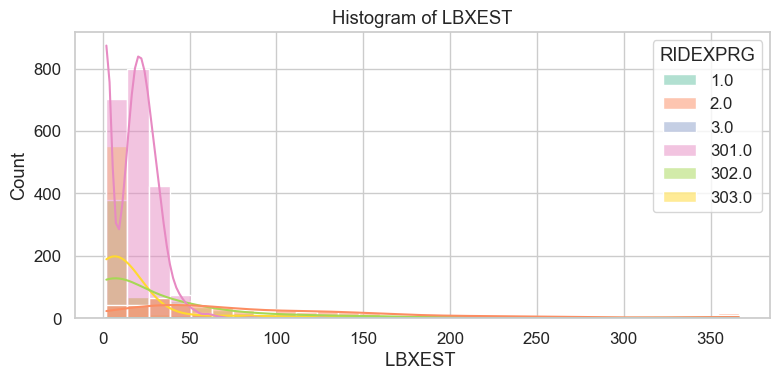

In [108]:
plot_df(df_20, plot_type="hist", columns=['LBXEST'], hue="RIDEXPRG")

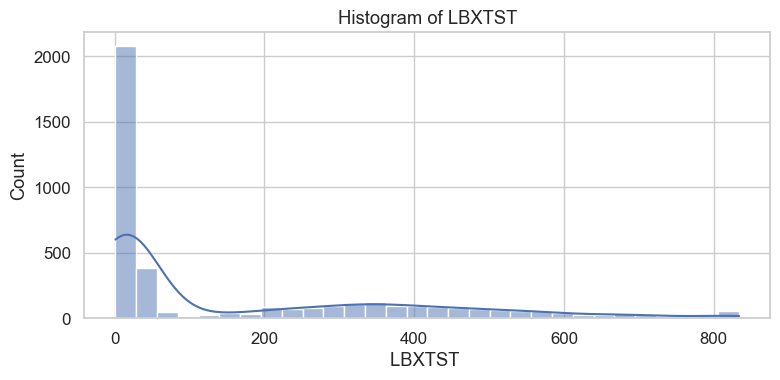

In [105]:
plot_df(df_20, plot_type="hist", columns=['LBXTST'])